In [28]:
import numpy as np
import xarray as xr


import matplotlib.pyplot as plt
import matplotlib.ticker as tic
from matplotlib.ticker import ScalarFormatter


from pprint import pprint

In [29]:
ds = xr.open_dataset('../../../data/netcdf_files/mxclim.nc')

In [30]:
U = ds.U[0,:,:]
V = ds.V[0,:,:]



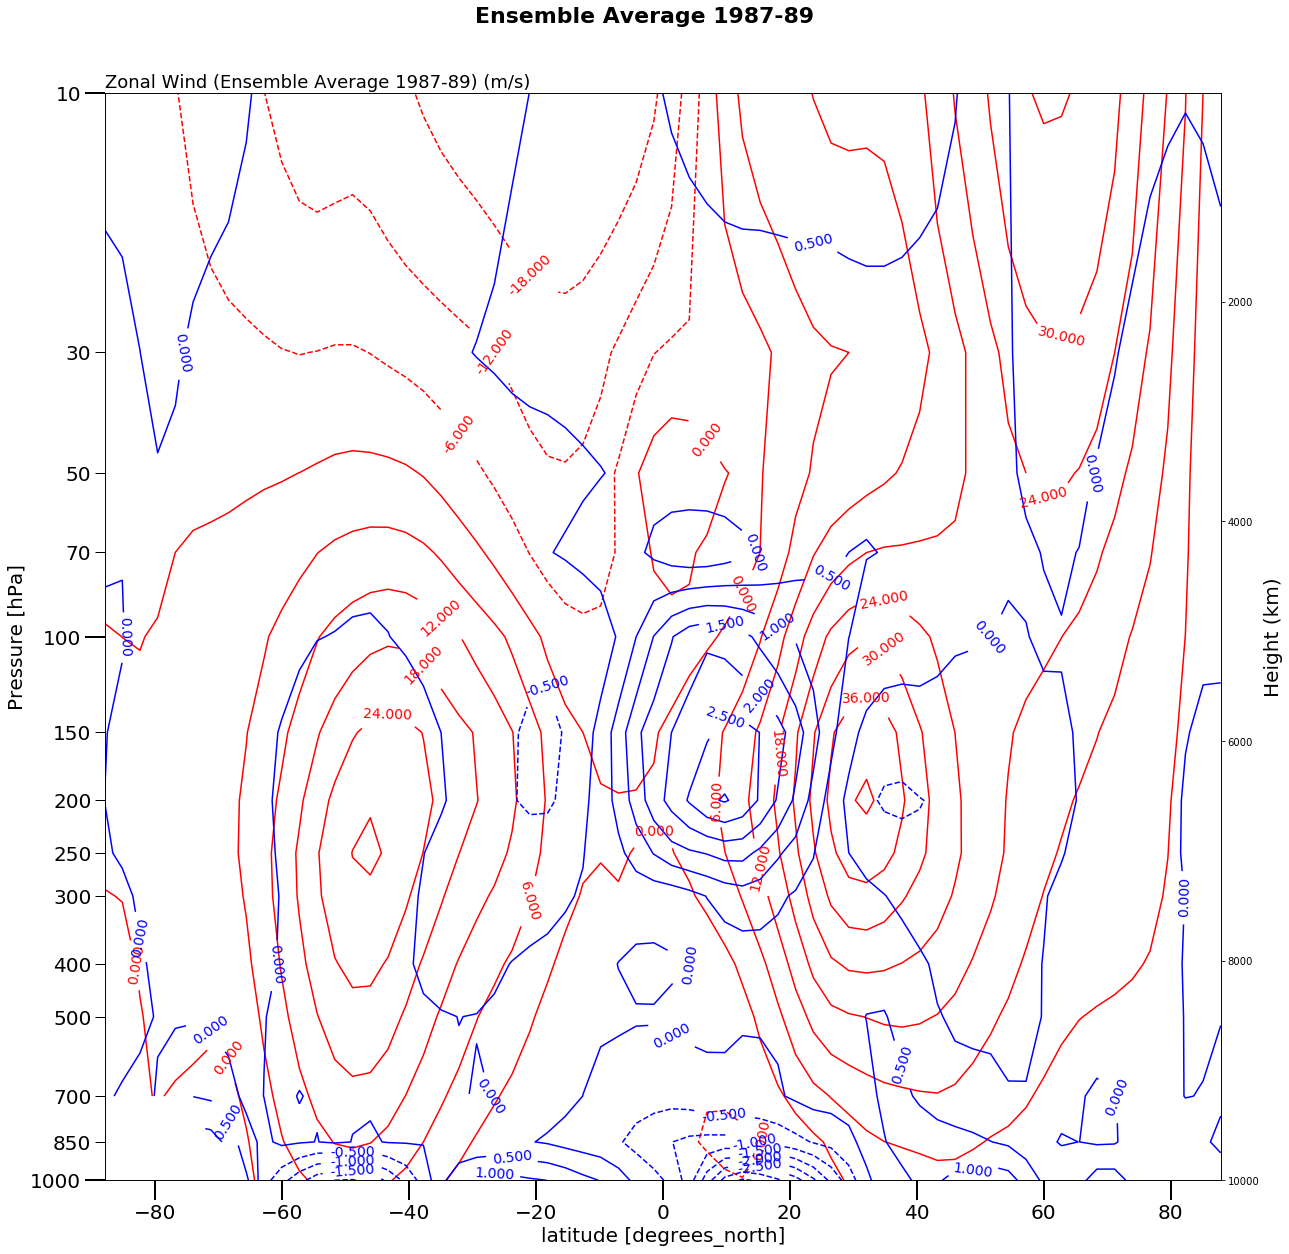

In [99]:
plt.rcParams['figure.figsize'] = [20, 20]
fig, ax = plt.subplots()
fig.suptitle('Ensemble Average 1987-89', fontsize=22, fontweight='bold', y=0.94)

#
# y axis is log scale
#
plt.yscale('log')


p = U.plot.contour(ax=ax,  levels=16, colors='red', extend='neither')
ax.clabel(p, inline=1, fontsize=14)
ax.set_ylim(ax.get_ylim()[::-1])



p = V.plot.contour(ax=ax,  levels=16, colors='blue', extend='neither')
ax.clabel(p, inline=1, fontsize=14)
ax.set_ylim(ax.get_ylim()[::-1])
ax.yaxis.set_major_formatter(ScalarFormatter())
plt.title('') # Someone (xarray?) generates their own title



# 
# Hard code the y-axis (pressure) level tic locations. Necessary?
#
ax.yaxis.set_minor_locator(plt.FixedLocator([30,50,70, 150, 200, 250, 300, 400, 500, 700, 850]))

#
# Change formatter or else we tick values formatted in exponential form
#
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_minor_formatter(ScalarFormatter())

#
# Tweak label sizes, etc.
#
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.tick_params('both', length=20, width=2, which='major', labelsize=20)
ax.tick_params('both', length=10, width=1, which='minor', labelsize=20)

#
# This is how we get the y-axis on the right side plotted to show geopotential height. 
# Currently we're using bogus values for height 'cause we haven't figured out how to make this work.
#
dummy = 10
axRHS = ax.twinx()
mn, mx = ax.get_ylim()
axRHS.set_ylim(mn*dummy, mx*dummy)
axRHS.set_ylabel('Height (km)')
axRHS.yaxis.label.set_size(20)


#
# add a title to the plot axes. What happens if xarray data set doesn't have long_name and units?
#
ax.set_title(U.long_name + ' (' + U.units+')', fontsize=18, loc='left')


plt.show()

